In [1]:
!nvidia-smi

Sun Jun 19 09:42:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.49       Driver Version: 457.49       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 165... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8     4W /  N/A |    530MiB /  4096MiB |     27%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
    #importing the necessary libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Loading Dataset**

In [4]:
(x_tr,y_tr),(x_tst,y_tst) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [13]:
#shapes of the training and testing data
print(f'traing data : {x_tr.shape} || testing data : {x_tst.shape}')

traing data : (60000, 28, 28) || testing data : (10000, 28, 28)


***Data Visualisation***

label : 0


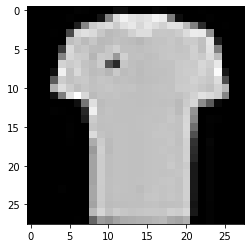

In [34]:
##random sample from the data set
rand = random.randint(1,len(x_tr))
plt.imshow(x_tr[rand],cmap='gray')
print(f'label : {y_tr[rand]}')

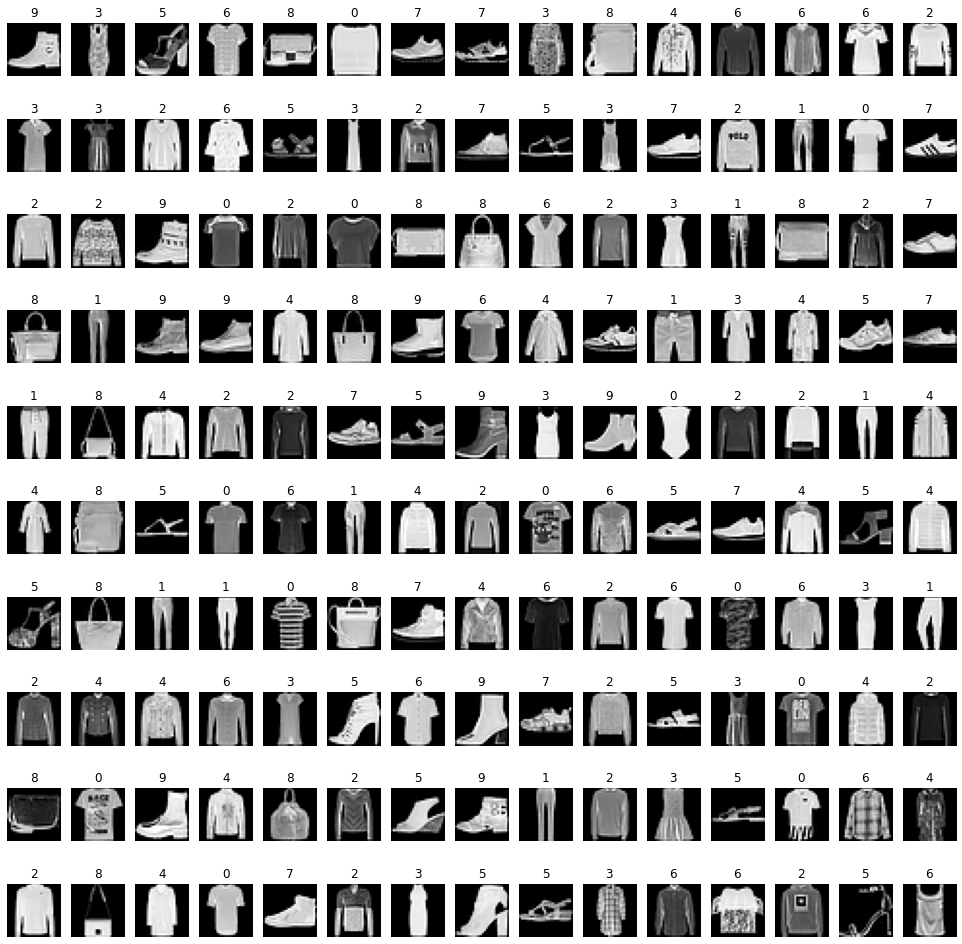

In [38]:
wid = 15
leng = 10
fig, axes = plt.subplots(leng, wid, figsize = (17,17))

axes = axes.ravel() # flatten

len_tr = len(x_tr) # length of the training dataset

for i in np.arange(0, wid * leng): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, len_tr)
    # read and display an image with the selected index    
    axes[i].imshow(x_tr[index], cmap = plt.cm.gray)
    axes[i].set_title(y_tr[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

***Data Preprocessing***

In [43]:
#preparing the data to fit for the Process(noise introduction and training)
#divide each pixel value with max value of the pixel to get the pixel value b/w 0...1

x_tr,x_tst = x_tr/255.0,x_tst/255.0

Adding Noise

In [51]:
noiseFactor = 0.15

alteredSet = list()

#adding the noise to the dataset
for img in x_tr:
    noiseImg =  img + noiseFactor*np.random.randn(*img.shape)
    noiseImg = np.clip(noiseImg,0.,1.)
    alteredSet.append(noiseImg)


alteredSet = np.array(alteredSet)

In [52]:
alteredSet.shape

(60000, 28, 28)

Original


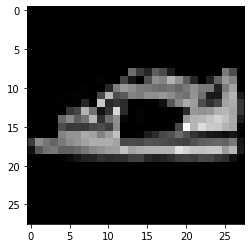

In [59]:
plt.imshow(x_tr[13], cmap='gray')
print('Original')

Noised added Images


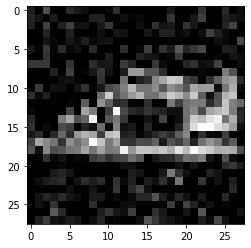

In [58]:
plt.imshow(alteredSet[13],cmap = 'gray')
print('Noised added Images')

In [60]:
#altering the test data also

alteredTestSet = list()

for img in x_tst:
    noisedImg = img + noiseFactor *np.random.randn(*img.shape)
    noisedImg = np.clip(noisedImg,0.,1.)
    alteredTestSet.append(noisedImg)

alteredTestSet = np.array(alteredTestSet)
alteredTestSet.shape

(10000, 28, 28)

AutoEncoder Building and Training

In [68]:
autoEn = tf.keras.models.Sequential()

#Encoder 
autoEn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,strides = 2, padding = 'same' ,input_shape = (28,28,1) ))

#Relu activation function is used with the convoluted Nueral Network
autoEn.add(tf.keras.layers.Conv2D(filters  = 16, kernel_size = 3, strides = 2, padding ='same',activation = 'relu'))

#Encoded images
autoEn.add(tf.keras.layers.Conv2D(filters  = 16, kernel_size = 3, strides = 1, padding ='same',activation = 'relu'))

#Decoder 

autoEn.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, padding = 'same' , activation = 'relu'))

autoEn.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [69]:
autoEn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoEn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       9280      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        577       
 ranspose)                                                       
                                                                 
Total params: 17,121
Trainable params: 17,121
Non-trai

c:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
autoEn.fit(alteredSet.reshape(-1, 28, 28, 1), x_tr.reshape(-1, 28, 28, 1),batch_size= 128, 
            validation_data = (alteredTestSet.reshape(-1, 28, 28, 1),x_tst.reshape(-1, 28, 28, 1)),epochs = 16)

Epoch 1/16
469/469 [==============================] - 31s 47ms/step - loss: 0.3204 - val_loss: 0.2787
Epoch 2/16
469/469 [==============================] - 22s 47ms/step - loss: 0.2726 - val_loss: 0.2715
Epoch 3/16
469/469 [==============================] - 22s 47ms/step - loss: 0.2677 - val_loss: 0.2686
Epoch 4/16
469/469 [==============================] - 23s 49ms/step - loss: 0.2658 - val_loss: 0.2670
Epoch 5/16
469/469 [==============================] - 22s 47ms/step - loss: 0.2643 - val_loss: 0.2657
Epoch 6/16
469/469 [==============================] - 22s 46ms/step - loss: 0.2631 - val_loss: 0.2647
Epoch 7/16
469/469 [==============================] - 23s 50ms/step - loss: 0.2622 - val_loss: 0.2638
Epoch 8/16
469/469 [==============================] - 22s 46ms/step - loss: 0.2614 - val_loss: 0.2631
Epoch 9/16
469/469 [==============================] - 22s 46ms/step - loss: 0.2609 - val_loss: 0.2627
Epoch 10/16
469/469 [==============================] - 23s 49ms/step - loss: 0.260

**Evaluation**

In [72]:
Evaluate = autoEn.evaluate(alteredTestSet.reshape(-1, 28, 28, 1), x_tst.reshape(-1, 28, 28, 1))
Evaluate

313/313 [==============================] - 2s 6ms/step - loss: 0.2608


0.26078927516937256

In [73]:
predicts = autoEn.predict(alteredTestSet[:15].reshape(-1, 28, 28, 1))

1/1 [==============================] - 10s 10s/step


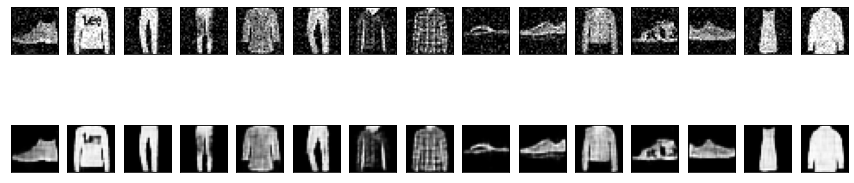

In [77]:
fig , axes = plt.subplots(nrows=2, ncols=15, sharex =True , sharey =True, figsize=(15,4))
for images, row in zip([alteredTestSet[:30], predicts], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap=plt.cm.gray)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)